## Assignment 1
Author : Wei-Ting Lin (S3698773)

In [1]:
import tweepy as tw
import pandas as pd
import numpy as np
import json 
import sys
import string
from collections import Counter
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer


In [2]:
consumerKey = "3f6LOGl7q55VuiTyPz0d2x47Z"
consumerSecret = "B9HcB5D0W3GjSc2mssazgMwXUpoFkDriyQ0AzFQOSQVpnh520w"
accessToken = "1081503850396233728-rgDSLfJ5PKrPaTZWO6xM1Q6RAzaHpi"
accessSecret = "c4caHoA47kfl19chCEKdk2sZ0LzXXhav4952tfpKYFHSk"

## Retrieve data

In [3]:
auth = tw.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessSecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [235]:
#define search term and start date as variables
search_terms = "#netflix"
date_start = "2019-09-3"
#filter out all retweets, since it has duplicated contents
search_terms_2 = search_terms + " -filter:retweets"
search_terms_2

'#netflix -filter:retweets'

In [4]:
#define search term and start date as variables
search_terms = "#netflix"
date_start = "2016-09-3"
#filter out all retweets, since it has duplicated contents
search_terms_2 = search_terms + " -filter:retweets"
search_terms_2

'#netflix -filter:retweets'

In [5]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_terms_2,
              lang="en",
              since=date_start).items(20)
tweets

In [6]:
#get list of tweets
tweets_all = [tweet.text for tweet in tweets]
tweets_all[0]

['@chelseahandler loved your documentary albeit needed to be series rather than one off. Only scratched the surface.… https://t.co/AFeH8Lncwb',
 'I’m watching the dumbest movie  - but acting is good and I’m just so over the dumb ass script but can’t make myself… https://t.co/IeKqqx0Ba0',
 'A great watch on #Designthinking and #design to solve one of the greatest challenges of the world in sustainable de… https://t.co/DkbvLnERaF',
 '#NowWatching #Vikings on #AmazonPrimeVideo - or more like finishing up the series. It’s so odd bc I watched… https://t.co/Xc91yITITM',
 'NW: Ghost Wars. Season 1 episode 1. #Netflix',
 '@mexopolis Book of Revelations and the Four Horned Escape Goats on #Netflix This Fall (Armageddon permitting)',
 'Melinda Gates is my new hero #SheRo #InsideBillsBrain #Netflix',
 'Totally rewatching #Vagabond on #Netflix https://t.co/1iPHg13k4x',
 'All The #Best Stuff Coming To #Netflix In #October2019 #ElCaminoABreakingBadAMovie #ElCamino #BreakingBad https://t.co/w9a96YJni

In [11]:
for tweet in tweets:
    print(tweet.text)

In [236]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_terms_2,
              lang="en",
              since=date_start).items(2000)
tweets

In [237]:
#get list of tweets
tweets_all = [tweet.text for tweet in tweets]
tweets_all

['Oh #netflix subscription prices going up again... Half tempted to cancel it 😂',
 'Favorite Rom Com By Netflix #noahcentineo #lanacondor #israelbroussard #lauramarano #CamilaMendes #KJApa… https://t.co/i56Ewc9huC',
 "Now Watch This\nSacha Baron Cohen's amazing turn, in a straight role in  The Spy on #Netflix Based on a true story.… https://t.co/lkFUevL0ZA",
 '#workingmoms on #netflix is really good. Anyone seen it? Captures the soul (mess)of todays working moms beautifully.',
 '@NetflixIndia your app is not compatible with iPad Mini!!!\n\nWhat the fuck???\n#Netflix #netflixindia',
 'Hit me with a recommendation on #Netflix please and thank you',
 'Yoga and Chill  try out one or more of these #yoga poses while watching your favorite #Netflix series.… https://t.co/EUp1bIS1Y7',
 '@Netflixhelps hey guys! Are you having security issues right now? Had my email and password change on my account an… https://t.co/rTvreGPgIA',
 '#BlackAdder on #Netflix with #Aloy 😍🐶🐕 https://t.co/83XdOkUERT',
 

In [238]:
np.shape(tweets_all)

(2000,)

In [355]:
#make the list of 100 sample tweets into json format
tweets_all_json = json.dumps(tweets_all[:100])

In [356]:
#write 100 sample tweets we collected into json file.
import json
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(tweets_all_json, f, ensure_ascii=False, indent=4)

## Text Preprocessing

In [268]:
# Pre-processing 1: Clean tweets text by removing links, special characters
# helper function to clean tweets

import re

def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-268-221e2d844ff4>:10: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('@[^\s]+','',tweet)


In [269]:
for line in tweets_all:
    tweets_all_clean = [processTweet(line) for line in tweets_all]

In [245]:
print(tweets_all_clean)

['subscription prices going again half tempted cancel ', 'favorite rom com netflix … ', 'now watch this\nsacha baron cohen amazing turn straight role the spy based true story … ', 'really good anyone seen captures the soul mess todays working moms beautifully ', 'your app not compatible with ipad mini what the fuck ', 'hit with recommendation please and thank you', 'yoga and chill try out one more these poses while watching your favorite series … ', 'hey guys are you having security issues right now had email and password change account … ', 'with  ', 'the garthim that appear explained\nlink ', 'what are your top series netflix right now wife and need something new … ', 'day addiction @ allensville ohio ', 'how true crime blogger exposed ohio high school rape crew ', 'the scene mentioned earlier ', 'many come find out more about provocative short and collections … ', '', 'hello would love get interview for marketing creative producer mesa job opportunity and here … ', ' ', 'when will m

In [271]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['...','“','”','’','…']
    return [w for w in word_list if w not in remove]


In [272]:
lTokenized = text_process(tweets_all_clean)
lTokenized = [text for text in remove_words(lTokenized)]

In [273]:
lTokenized

['subscription',
 'prices',
 'going',
 'half',
 'tempted',
 'cancel',
 'favorite',
 'rom',
 'com',
 'netflix',
 'watch',
 'sacha',
 'baron',
 'cohen',
 'amazing',
 'turn',
 'straight',
 'role',
 'spy',
 'based',
 'true',
 'story',
 'really',
 'good',
 'anyone',
 'seen',
 'captures',
 'soul',
 'mess',
 'todays',
 'working',
 'moms',
 'beautifully',
 'app',
 'compatible',
 'ipad',
 'mini',
 'fuck',
 'hit',
 'recommendation',
 'please',
 'thank',
 'youyoga',
 'chill',
 'try',
 'one',
 'poses',
 'watching',
 'favorite',
 'series',
 'hey',
 'guys',
 'security',
 'issues',
 'right',
 'email',
 'password',
 'change',
 'account',
 'garthim',
 'appear',
 'explained',
 'link',
 'top',
 'series',
 'netflix',
 'right',
 'wife',
 'need',
 'something',
 'new',
 'day',
 'addiction',
 '@',
 'allensville',
 'ohio',
 'true',
 'crime',
 'blogger',
 'exposed',
 'ohio',
 'high',
 'school',
 'rape',
 'crew',
 'scene',
 'mentioned',
 'earlier',
 'many',
 'come',
 'find',
 'provocative',
 'short',
 'collectio

## Data Exploration

In [251]:
# our term frequency counter
termFreqCounter = Counter(lTokenized)

# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))

watching: 200
netflix: 185
watch: 160
season: 130
series: 119
show: 103
good: 102
new: 101
one: 90
like: 80
movie: 74
love: 68
watched: 67
shows: 60
best: 57
great: 53
time: 53
get: 52
episode: 52
need: 50
spy: 46
first: 46
really: 43
binge: 42
right: 41
movies: 41
know: 41
last: 41
dark: 41
see: 41
would: 40
finished: 39
much: 38
back: 37
amazing: 36
story: 36
anyone: 35
please: 35
film: 35
make: 32
night: 31
special: 29
want: 29
crystal: 29
got: 29
going: 28
notes: 28
asylum: 28
seen: 27
people: 27


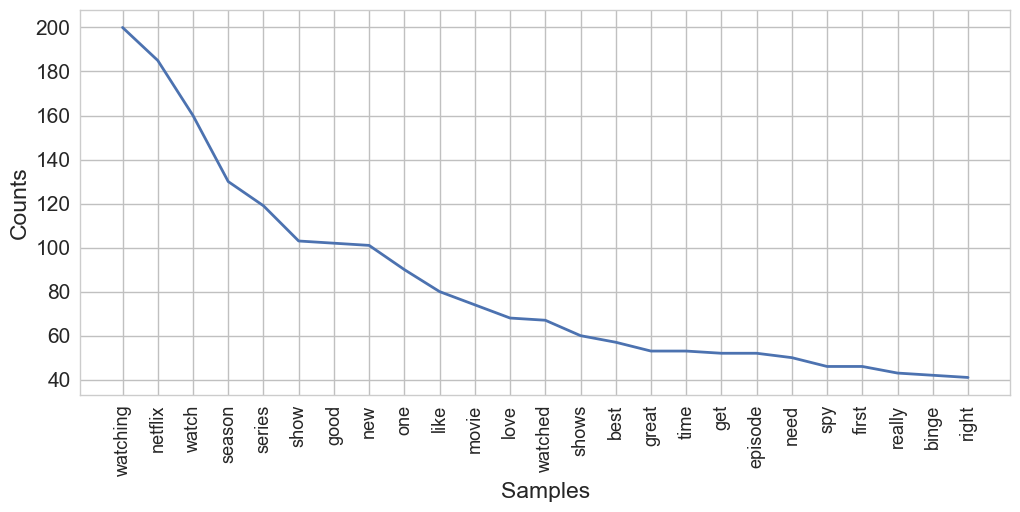

In [252]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=70)
fd = nltk.FreqDist(lTokenized)
fd.plot(25,cumulative=False)


In [324]:
#create dataframe for frequent words 
term = [term for term , count in termFreqCounter.most_common(freqNum)]
count = [count for term, count in termFreqCounter.most_common(freqNum)]
freq_count = pd.DataFrame({'term': term , 'count':count})
freq_count.head()

,term,count
0,watching,200
1,netflix,185
2,watch,160
3,season,130
4,series,119


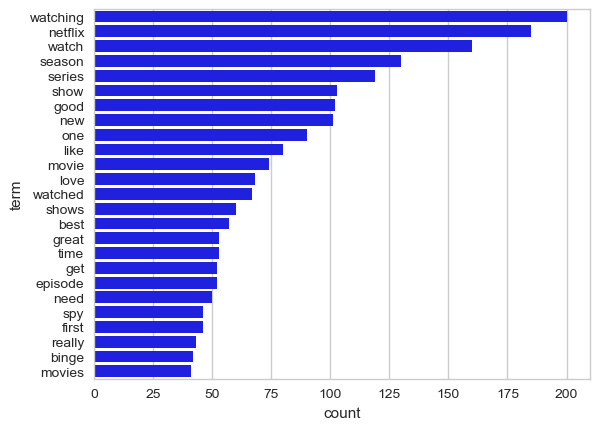

In [334]:
# horizontal bar plot for frequent words 
import seaborn as sns

freq_count_sorted = freq_count.sort_values('count',ascending=False).head(25)

sns.set(style="whitegrid")
# ax = sns.barplot(x="day", y="total_bill", data=tips)
ax = sns.barplot(x="count", y="term", data=freq_count_sorted, color = "blue")

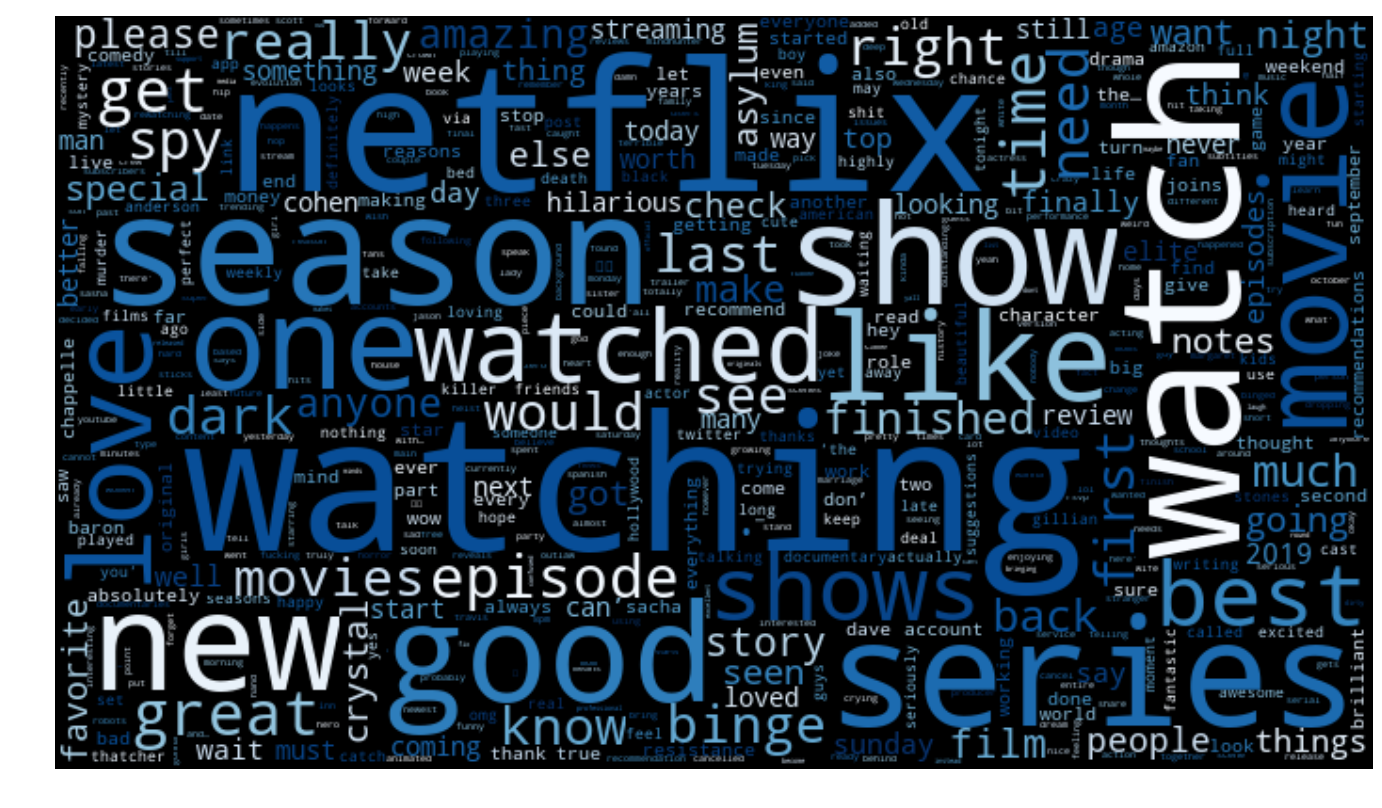

In [289]:

# # create a word frequency dictionary
wordfreq = Counter(lTokenized)

# draw a Word Cloud with word frequencies
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=700,
                      height=400,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment analysis

In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import networkx
from textblob import TextBlob
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [255]:
# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'looks like next movie will called “jack beton” aka “the spy” netflix yet ']

In [256]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.0,looks like next movie will called “jack beton”...
1,0.0,wait took episodes bring earth and took minute...
2,-0.6,still doing the world dirty work pakistan all ...
3,0.0,rectify
4,0.7,just watched film called really good film reco...


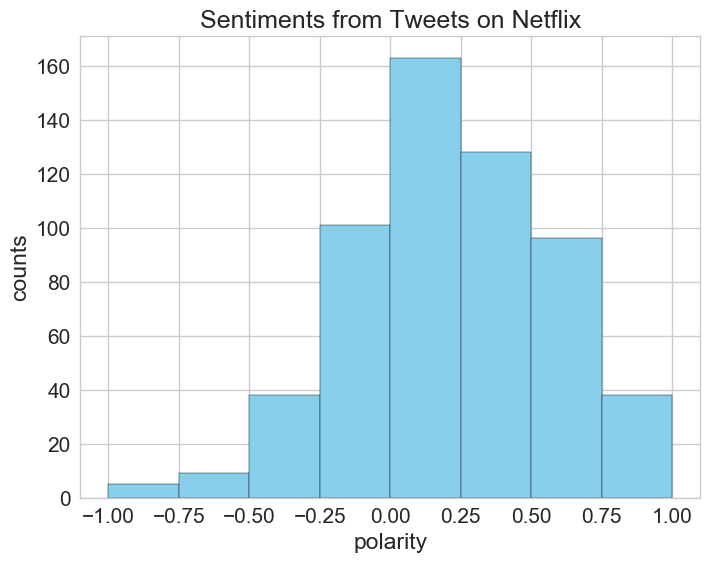

In [306]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="skyblue",
             edgecolor = "black")


plt.title("Sentiments from Tweets on Netflix")
plt.xlabel("polarity")
plt.ylabel("counts")
plt.show()

## Topic Modeling 

In [258]:
import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn

In [343]:
#
# LDA parameters
#

# number of topics to discover (default = 10)
topicNum = 10
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 5
# the number of features/words to used to describe our documents
featureNum = 1500

In [344]:
"""
Performs counting via CountVectorizer and then apply the LDA model.
"""
# Count Vectorizer
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(tweets_all_clean)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names()


# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=15, learning_method='online').fit(tf)

In [345]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [346]:
#
# Diplays discovered topics
#

display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
make things season check week
Topic 1:
want day coming character amazon
Topic 2:
season watch need netflix film
Topic 3:
watching just series like spy
Topic 4:
movie netflix watch good best
Topic 5:
watched just way star years
Topic 6:
watching time sunday hilarious comedy
Topic 7:
dark let crystal age resistance
Topic 8:
notes asylum favorite year read
Topic 9:
new shows special 2019 netflix


## Topic Model Visualisation 

In [347]:
#
# pyLDAvis
#
panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [286]:
# wordcloud
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]


    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1) , fontsize = 12)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

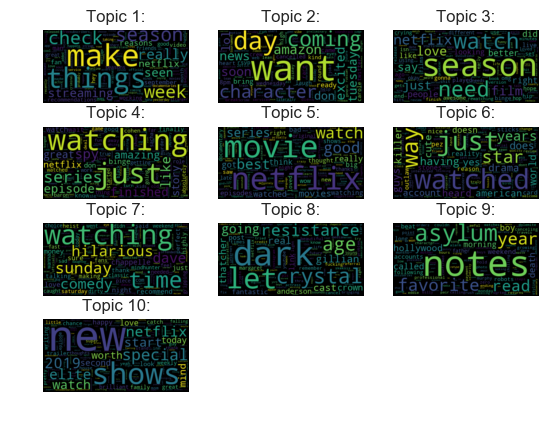

In [348]:
# display wordcloud

displayWordcloud(ldaModel, tfFeatureNames)